In [112]:
#로지스틱 회귀
#Decision Tree
#랜덤 포레스트
# 잉싱블 기법 주 하나
# gini 지수, entrophy
# 잘맞는 포레스트 찾기.
# 카이제곱 검정!
# 

In [113]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("./data/FIC.Full CSV.csv")

In [115]:
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [117]:
df.columns = df.columns.str.replace(" ","")

In [118]:
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = pd.Categorical(df[i])
    else:
        continue

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   Age.Group         368 non-null    category
 2   Gender            368 non-null    category
 3   Locality          368 non-null    category
 4   Maritalstatus     368 non-null    category
 5   Life.Style        368 non-null    category
 6   Sleep             368 non-null    category
 7   Category          368 non-null    category
 8   Depression        368 non-null    category
 9   Hyperlipi         368 non-null    category
 10  Smoking           368 non-null    category
 11  Family.History    368 non-null    category
 12  F.History         368 non-null    int64   
 13  Diabetes          368 non-null    int64   
 14  HTN               368 non-null    category
 15  Allergies         368 non-null    category
 16  BP                368 non-

In [97]:
#df.replace?

In [98]:
# #Recoding categorcial variables
# df["F.History"].replace(to_replace={"YES" : 0, "NO" : 1}, inplace= True)
# df["Diabetes"].replace(to_replace={"YES" : 0, "NO" : 1}, inplace= True)
# df["Thrombolysis"].replace(to_replace={"YES" : 0, "NO" : 1}, inplace= True)
# df.cp=pd.Categorical(df.cp,categories=[1,2,3,4],ordered=True)
# df.cp = df.cp.map({1:"Grade_1",2:"Grade_2",3:"Grade_3",4:"Grade_4"})
# df["fbs"].replace(to_replace=[0,1],value=["<=120mg/dl",">120mg/dl"], inplace= True)
# df["restecg"].replace(to_replace=[0,1,2],value=["normal","ST_T_abnormal","LVH"], inplace= True)
# df["Mortality"].replace(to_replace=[0,1],value=["Died","Alive"], inplace= True)
# df.Mortality=pd.Categorical(df.Mortality,categories=("Alive","Died"))
# df["Age.Group"] = pd.Categorical(df["Age.Group"],categories=('21-30', '31-40', '41-50', '51-60', '61-70'),ordered=True)

In [99]:
# df["Thrombolysis"].replace(to_replace={"YES" : 0, "NO" : 1}, inplace= True)
# df["Thrombolysis"]

In [120]:
df.shape

(368, 60)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   Age.Group         368 non-null    category
 2   Gender            368 non-null    category
 3   Locality          368 non-null    category
 4   Maritalstatus     368 non-null    category
 5   Life.Style        368 non-null    category
 6   Sleep             368 non-null    category
 7   Category          368 non-null    category
 8   Depression        368 non-null    category
 9   Hyperlipi         368 non-null    category
 10  Smoking           368 non-null    category
 11  Family.History    368 non-null    category
 12  F.History         368 non-null    int64   
 13  Diabetes          368 non-null    int64   
 14  HTN               368 non-null    category
 15  Allergies         368 non-null    category
 16  BP                368 non-

<Axes: >

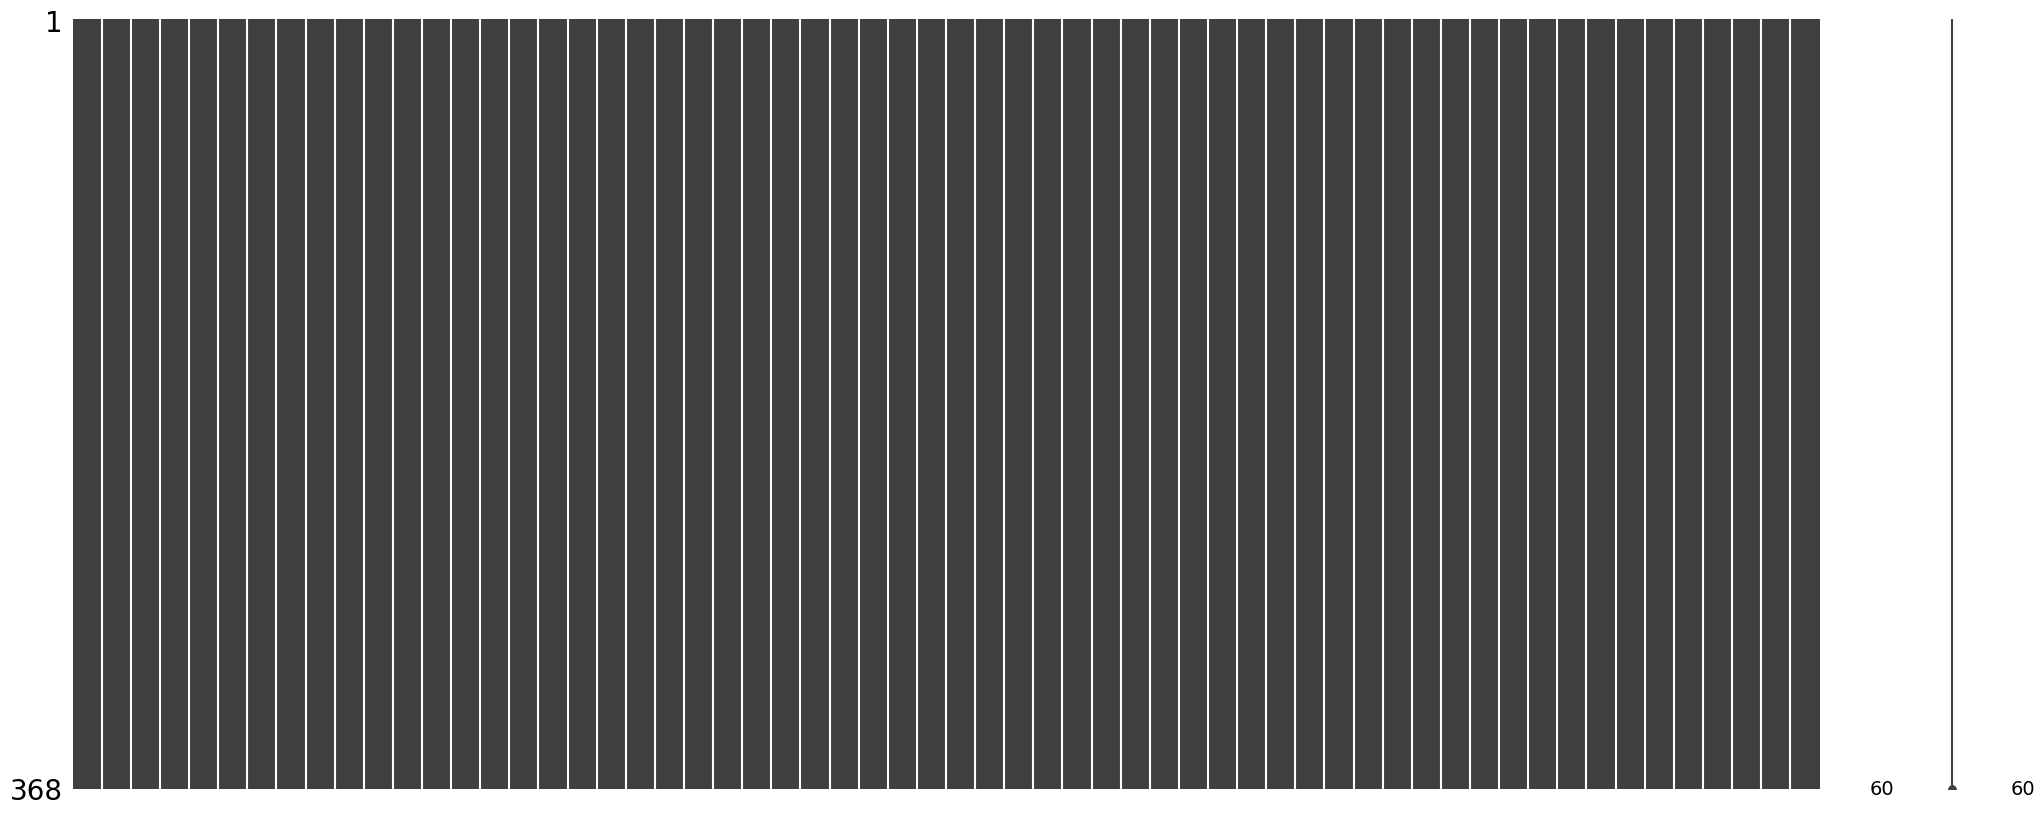

In [122]:
import missingno as msno
msno.matrix(df)

In [103]:
df.describe().T.sort_values(by="mean", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
PLATELET_COUNT,368.0,248660.33,76707.56,20000.00,192000.00,237000.00,287000.00,459000.00
WBC,368.0,11181.28,3517.88,5800.00,7800.00,10650.00,13500.00,19590.00
C.P.K,368.0,553.89,957.61,52.00,135.00,188.00,390.00,4289.00
chol,368.0,248.94,50.13,131.00,212.00,249.00,283.00,409.00
BGR,368.0,219.99,139.34,60.00,117.00,164.00,291.00,563.00
thalach,368.0,140.92,22.99,71.00,125.00,144.00,158.00,195.00
S.Sodium,368.0,138.02,4.08,129.00,135.00,138.00,141.00,146.00
trestbps,368.0,132.74,18.19,100.00,120.00,130.00,142.00,200.00
BP,368.0,121.21,24.54,80.50,100.70,120.80,140.70,190.11
S.Chloride,368.0,103.82,4.80,90.00,100.00,104.00,107.00,112.00


In [124]:
categories = list()
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        pd.get_dummies(df, columns=[i], drop_first=True)
        categories.append(i)
    else:
        continue
print(categories)

['Age.Group', 'Gender', 'Locality', 'Maritalstatus', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'HTN', 'Allergies', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'SK.React']


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   Age.Group         368 non-null    category
 2   Gender            368 non-null    category
 3   Locality          368 non-null    category
 4   Maritalstatus     368 non-null    category
 5   Life.Style        368 non-null    category
 6   Sleep             368 non-null    category
 7   Category          368 non-null    category
 8   Depression        368 non-null    category
 9   Hyperlipi         368 non-null    category
 10  Smoking           368 non-null    category
 11  Family.History    368 non-null    category
 12  F.History         368 non-null    int64   
 13  Diabetes          368 non-null    int64   
 14  HTN               368 non-null    category
 15  Allergies         368 non-null    category
 16  BP                368 non-

In [126]:
df.remove('Mortality')

AttributeError: 'DataFrame' object has no attribute 'remove'

In [107]:
#list of all categorical variables
categories

['Age.Group',
 'Gender',
 'Locality',
 'Maritalstatus',
 'Life.Style',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'cp',
 'SK.React']

In [108]:
from scipy.stats import chi2_contingency

In [109]:
significant_categories=list()
for category in categories:
    table = pd.crosstab(df[category],df.Mortality)
    stat, p, dof, expected =chi2_contingency(table)
    alpha = 0.05
    if p <= alpha:  
        print("Category: ",category)
        print("P-value: ", p.round(3))
        print("H0 rejected","\n")
        fig = px.histogram(df, x= category, color = 'Mortality', color_discrete_map= {"Alive":"aqua","Died":"deeppink"})
        fig.show()
    else:
        continue
    significant_categories.append(category)
print(significant_categories)

Category:  Age.Group
P-value:  0.0
H0 rejected 



Category:  Gender
P-value:  0.0
H0 rejected 



Category:  Locality
P-value:  0.028
H0 rejected 



Category:  Category
P-value:  0.022
H0 rejected 



Category:  Smoking
P-value:  0.003
H0 rejected 



Category:  Family.History
P-value:  0.023
H0 rejected 



Category:  HTN
P-value:  0.001
H0 rejected 



Category:  Others
P-value:  0.0
H0 rejected 



Category:  CO
P-value:  0.0
H0 rejected 



Category:  Diagnosis
P-value:  0.0
H0 rejected 



Category:  cp
P-value:  0.03
H0 rejected 



Category:  SK.React
P-value:  0.0
H0 rejected 



['Age.Group', 'Gender', 'Locality', 'Category', 'Smoking', 'Family.History', 'HTN', 'Others', 'CO', 'Diagnosis', 'cp', 'SK.React']


In [110]:
significant_categories

['Age.Group',
 'Gender',
 'Locality',
 'Category',
 'Smoking',
 'Family.History',
 'HTN',
 'Others',
 'CO',
 'Diagnosis',
 'cp',
 'SK.React']

In [111]:
df.corr()

ValueError: could not convert string to float: 'NO'

In [72]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr().round(1),vmin= df.corr().values.min(),vmax=1.0,cmap="GnBu",square = True,annot=True, annot_kws={"fontsize":20})
sns.set(font_scale=2)

ValueError: could not convert string to float: 'NO'

<Figure size 4000x4000 with 0 Axes>

In [179]:
numerical=df.groupby(by=df.Mortality).mean().T.sort_values(by="Died",ascending=False).style.highlight_max(axis=1, color = "yellow")
numerical

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [149]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state = 0,stratify = y)

In [21]:
# from sklearn.preprocessing import StandardScaler
# std_scale = StandardScaler()
# std_scale.fit(X_tn)
# X_tn_std = std_scale.transform(X_tn)
# X_te_std = std_scale.transform(X_te)

In [22]:
from sklearn.linear_model import LogisticRegression
clf_logi_l2 = LogisticRegression(penalty = 'l2')
clf_logi_l2.fit(X_tn,y_tn)

ValueError: could not convert string to float: 'Male'